## Mounting Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
#Importing Libraries
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns


import tensorflow as tf

## Loading Data

In [62]:
data = pd.read_csv('/content/drive/MyDrive/higgs/training.csv', delimiter=',')

In [63]:
data.shape

(250000, 33)

In [64]:
data_new=data.drop(["Weight"], axis=1)
data_new.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b


In [60]:
data_new= data_new[['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet','Label']]

In [65]:
data_new

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b


## EDA

In [9]:
data_new.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [10]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [11]:
data_new.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

b    164333
s     85667
Name: Label, dtype: int64


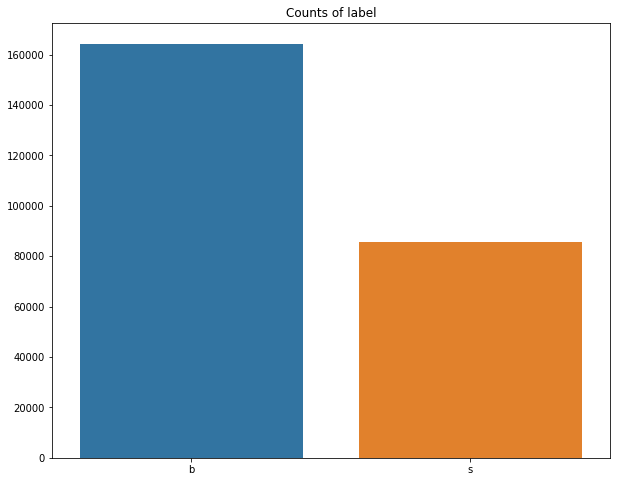

In [12]:
fig,axes=plt.subplots(figsize=(10,8))
print(data_new['Label'].value_counts())
sns.barplot(x = data_new['Label'].value_counts().index, y = data_new['Label'].value_counts().values)
plt.title('Counts of label')
plt.show()

In [13]:
#Finding Null Value
data_new.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [14]:
# Encoding the labels
label_data = preprocessing.LabelEncoder()
data_new['Label'] = label_data.fit_transform(data_new['Label'])
data_new.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


## Corelation Matrix

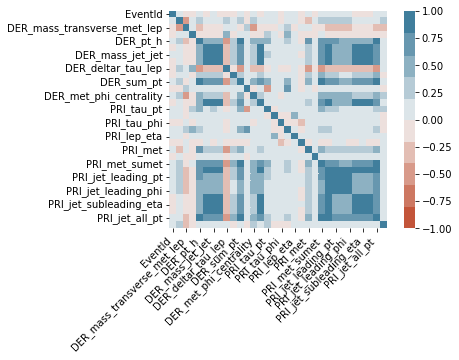

In [15]:
corr = data_new.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 230, n=10),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Box plot

In [17]:
#IQR Value of Each Column
Q1 = data_new.quantile(0.25)
Q3 =  data_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EventId                        124999.50000
DER_mass_MMC                       52.50550
DER_mass_transverse_met_lep        54.35700
DER_mass_vis                       32.87025
DER_pt_h                           65.10025
DER_deltaeta_jet_jet              999.49000
DER_mass_jet_jet                 1082.44600
DER_prodeta_jet_jet               994.40700
DER_deltar_tau_lep                  1.15100
DER_pt_tot                         24.75000
DER_sum_pt                        122.92825
DER_pt_ratio_lep_tau                0.89400
DER_met_phi_centrality              2.59600
DER_lep_eta_centrality            999.00000
PRI_tau_pt                         20.42525
PRI_tau_eta                         1.82300
PRI_tau_phi                         3.14000
PRI_lep_pt                         21.01500
PRI_lep_eta                         1.97300
PRI_lep_phi                         3.14000
PRI_met                            30.49700
PRI_met_phi                         3.13600
PRI_met_sumet                   

In [ ]:
import math
cols = 3
rows = math.ceil(len(data_new.columns)/cols)


fig, axen = plt.subplots(rows, cols, figsize = (12, 50))
for v, ax in zip(data_new.columns, axen.ravel()):
    sns.histplot(data_new[v], ax=ax)
    ax.set_xscale('log')

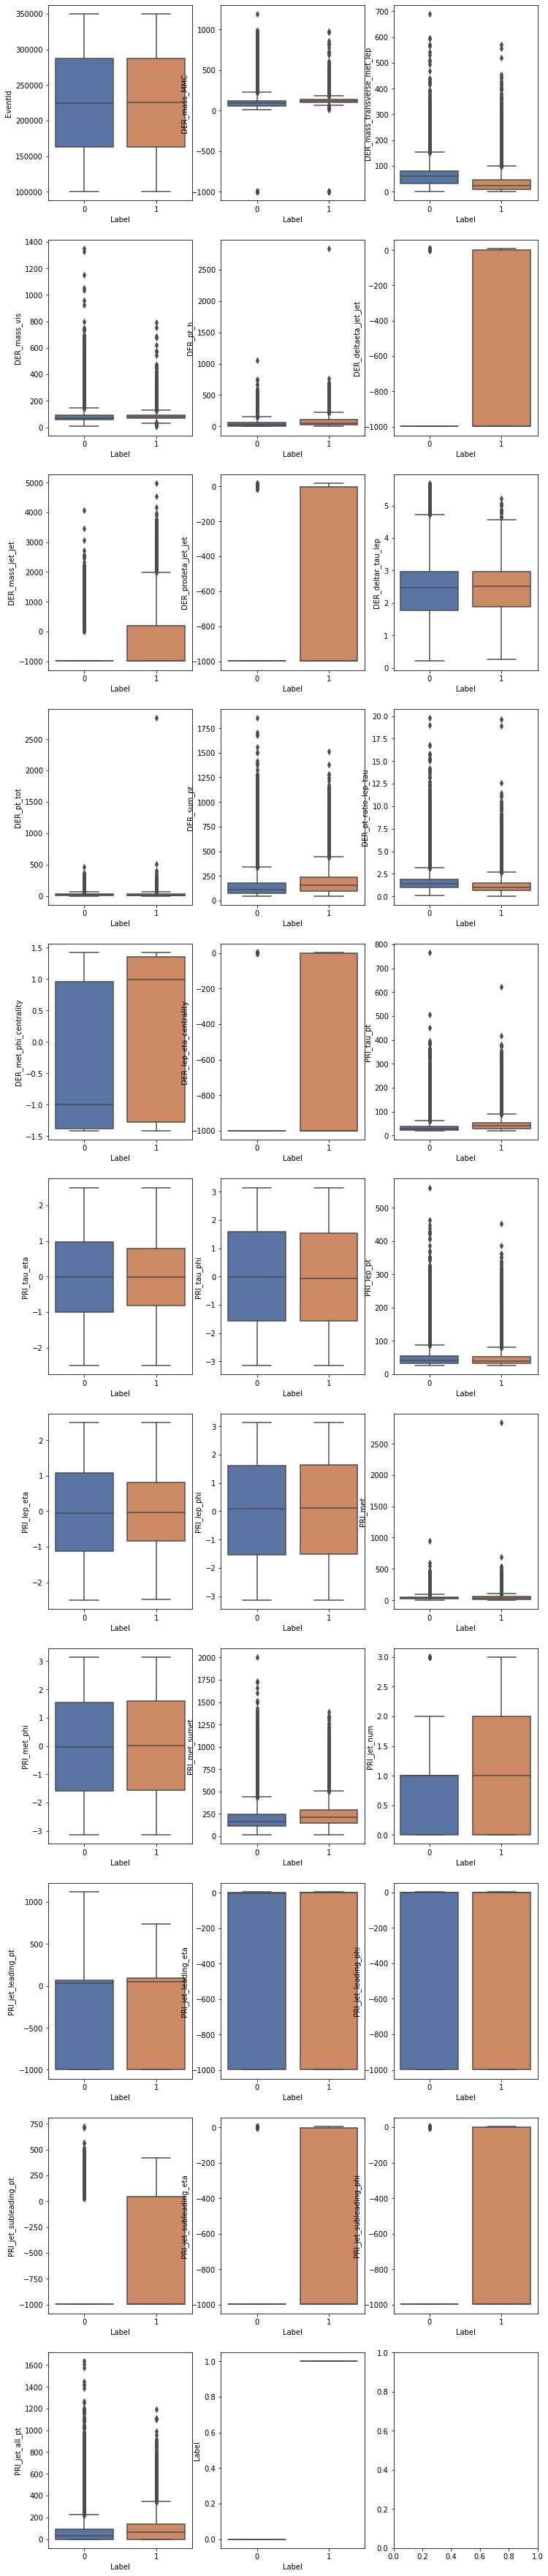

In [18]:
fig, axen = plt.subplots(rows, cols, figsize = (12, 64))
for v, ax in zip(data_new.columns, axen.ravel()):
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=data_new[v],
                data=data_new,ax=ax)

In [31]:
def remove_outlier(df):
    QI = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR =    Q3-Q1 
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    df_new= df[~((df > fence_low) & (df< fence_high))]
    return df_new

In [32]:
dr = remove_outlier(data_new)


In [34]:
dr.tail()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,Label
249995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dr.head()

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x="Label",
                y="DER_deltar_tau_lep",
                data=dr)

In [ ]:
fig, axen = plt.subplots(rows, cols, figsize = (12, nrows*4))
for v, ax in zip(data_new.columns, axen.ravel()):
    dr1= remove_outlier(data_new)
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=dr1[v],
                data=dr,ax=ax)

## Data Preprocessing

In [71]:
data_new.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
Label                          0
dtype: int64

In [108]:
data_new1= data_new[['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet','Label']]

In [109]:
label_data = preprocessing.LabelEncoder()
data_new1['Label'] = label_data.fit_transform(data_new1['Label'])
data_new1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,1
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,0
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,0
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,0
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,0


In [110]:
data_new1

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,1
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,0
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,0
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,0
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,0
...,...,...,...,...,...,...,...,...
249995,121.858528,71.989,36.548,5.042,2.403735,371.78336,-0.821688,0
249996,121.858528,58.179,68.083,22.439,2.403735,371.78336,-0.821688,0
249997,105.457000,60.526,75.839,39.757,2.403735,371.78336,-0.821688,1
249998,94.951000,19.362,68.812,13.504,2.403735,371.78336,-0.821688,0


In [111]:
data_new1[data_new1==-999.000] = np.NaN

In [112]:
data_new1.fillna(data_new1.mean(), inplace = True)

In [113]:

data_new1

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,1
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,0
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,0
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,0
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,0
...,...,...,...,...,...,...,...,...
249995,121.858528,71.989,36.548,5.042,2.403735,371.78336,-0.821688,0
249996,121.858528,58.179,68.083,22.439,2.403735,371.78336,-0.821688,0
249997,105.457000,60.526,75.839,39.757,2.403735,371.78336,-0.821688,1
249998,94.951000,19.362,68.812,13.504,2.403735,371.78336,-0.821688,0


In [114]:
y_train = data_new1['Label'].values
x_train = data_new1.drop(['Label'], axis=1)

In [25]:
x_train.astype

<bound method NDFrame.astype of         DER_mass_MMC  ...  PRI_jet_leading_phi
0         138.470000  ...             0.444000
1         160.937000  ...             1.158000
2         121.858528  ...            -2.028000
3         143.905000  ...            -0.012393
4         175.864000  ...            -0.012393
...              ...  ...                  ...
249995    121.858528  ...            -0.012393
249996    121.858528  ...            -0.012393
249997    105.457000  ...            -0.166000
249998     94.951000  ...            -0.012393
249999    121.858528  ...            -0.012393

[250000 rows x 22 columns]>

In [37]:
data_new.astype

<bound method NDFrame.astype of         DER_mass_MMC  DER_mass_transverse_met_lep  ...  PRI_jet_leading_phi  Label
0         138.470000                       51.655  ...             0.444000      1
1         160.937000                       68.768  ...             1.158000      0
2         121.858528                      162.172  ...            -2.028000      0
3         143.905000                       81.417  ...            -0.012393      0
4         175.864000                       16.915  ...            -0.012393      0
...              ...                          ...  ...                  ...    ...
249995    121.858528                       71.989  ...            -0.012393      0
249996    121.858528                       58.179  ...            -0.012393      0
249997    105.457000                       60.526  ...            -0.166000      1
249998     94.951000                       19.362  ...            -0.012393      0
249999    121.858528                       72.756  ... 

In [115]:
from sklearn.model_selection import train_test_split
X_train_SS, X_test_SS, y_train_SS, y_test_SS = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [113]:
pip install --upgrade pandas

     |████████████████████████████████| 11.3 MB 33.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.


In [116]:
import numpy
X_train_SS= X_train_SS.to_numpy()
X_test_SS=X_test_SS.to_numpy()

In [53]:
import pandas
print(pandas.__version__)

1.3.3


In [ ]:
X_test_SS=X_test_SS.to_numpy()

In [74]:
X_train_SS.shape

(167500, 7)

In [117]:
# reshape for rnn

X_train_SS = X_train_SS.reshape(X_train_SS.shape[0],X_train_SS.shape[1],1)
X_test_SS =X_test_SS.reshape(X_test_SS.shape[0],X_test_SS.shape[1],1)

In [76]:
columns_ = x_train.iloc[:].columns
columns_.shape

(7,)

In [77]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(x_train), columns = columns_)
df = pd.DataFrame(df_scaled)

In [78]:
df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
0,3.149107e-01,0.068332,0.407680,-0.469966,-1.591638e+00,-1.153306e+00,1.806346e+00
1,7.408270e-01,0.552505,0.540136,-0.153167,8.517525e-15,-4.776096e-15,-1.207516e-15
2,-2.963413e-14,3.195156,1.096560,-0.349710,8.517525e-15,-4.776096e-15,-1.207516e-15
3,4.179442e-01,0.910379,-0.005853,-0.903016,8.517525e-15,-4.776096e-15,-1.207516e-15
4,1.023804e+00,-0.914556,1.313369,-0.651804,8.517525e-15,-4.776096e-15,-1.207516e-15
...,...,...,...,...,...,...,...
249995,-2.963413e-14,0.643636,-1.093204,-0.830312,8.517525e-15,-4.776096e-15,-1.207516e-15
249996,-2.963413e-14,0.252913,-0.320829,-0.557013,8.517525e-15,-4.776096e-15,-1.207516e-15
249997,-3.109307e-01,0.319316,-0.130864,-0.284955,8.517525e-15,-4.776096e-15,-1.207516e-15
249998,-5.100973e-01,-0.845324,-0.302973,-0.697378,8.517525e-15,-4.776096e-15,-1.207516e-15


In [79]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca

,0,1,2,3,4,5,6
0,-2.681879,0.232380,-0.025619,-0.345093,0.500794,0.010832,0.009519
1,-0.142412,1.030859,-0.179472,0.180757,0.002148,-0.146402,0.004611
2,-0.409862,1.703162,-1.936360,2.021318,-0.050000,0.787459,-0.084861
3,-0.164672,0.634235,-1.115658,0.098398,0.070793,-0.355565,0.061264
4,-0.094121,1.361646,0.476124,-1.379051,0.133613,0.140507,0.073241
...,...,...,...,...,...,...,...
249995,-0.036599,-0.457129,-1.174442,0.146257,0.050238,-0.824082,0.078314
249996,-0.034779,-0.082414,-0.619433,-0.102458,0.050597,-0.264951,0.046940
249997,-0.020948,-0.170877,-0.492744,0.109066,0.023439,0.109531,0.009454
249998,0.093987,-0.714406,-0.206516,-0.982650,0.115667,0.081718,0.073371


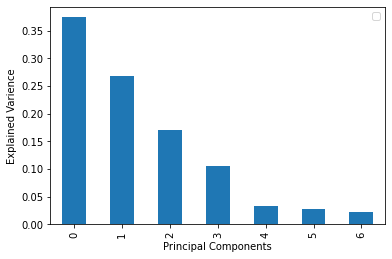

In [80]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [83]:
pca_15 = PCA(n_components=4, random_state = 2020)
principalComponents_15 = pca_15.fit_transform(df)
print('Explained variation by 4 principal components: {}'.format(sum(pca_15.explained_variance_ratio_)*100))

Explained variation by 4 principal components: 91.73045935736866


In [84]:

principal_cols = ['Principal component '+str(i) for i in range(principalComponents_15.shape[1])]
pca_df = pd.DataFrame(data = principalComponents_15,columns=principal_cols)
pca_df.head()

,Principal component 0,Principal component 1,Principal component 2,Principal component 3
0,-2.681879,0.232380,-0.025619,-0.345093
1,-0.142412,1.030859,-0.179472,0.180757
2,-0.409862,1.703162,-1.936360,2.021318
3,-0.164672,0.634235,-1.115658,0.098398
4,-0.094121,1.361646,0.476124,-1.379051


## Building LSTM Model

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import FixedLenFeature
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize
from keras.models import Sequential
from keras.layers import Bidirectional


In [118]:
def build_Lstm_model(train_x,train_y,test_x,test_y):
    inp = Input(shape=(train_x.shape[1],train_x.shape[2]))
    rnn_1st_model = LSTM(units=60, return_sequences=True,recurrent_dropout=0.1)(inp)
    rnn_2nd_model = LSTM(units=60,recurrent_dropout=0.1)(rnn_1st_model)
    dense_layer = Dense(128)(rnn_2nd_model)
    drop_out = Dropout(0.2)(dense_layer)
    output = Dense(1, activation= "sigmoid")(drop_out)
    model = Model(inp, output)
    callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
                 EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model_LSTM.h5', monitor='val_loss', save_best_only=True)]
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer="adam")
    history = model.fit(train_x, train_y, 
          epochs = 10, 
          batch_size = 128, 
          validation_data=(test_x,  test_y), 
          callbacks=callbacks)
    return history,model

In [128]:
def plot_Loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [119]:
history_LSTM,Lstm_model = build_Lstm_model(X_train_SS,y_train_SS,X_test_SS,y_test_SS)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 60)             14880     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               7808      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 51,857
Trainable params: 51,857
Non-trainable params: 0
_______________________________________________________

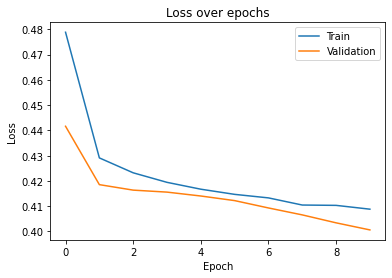

In [129]:
plot_Loss(history_LSTM)

In [120]:
Lstm_model.save("LSTM_Higgs_model.h5")

In [121]:
x_predict=[105.457000,	60.526,	75.839,	39.757,	2.403735,	371.78336,	-0.821688]

In [122]:
x_predict=np.array(x_predict)

In [123]:
df = pd.DataFrame(x_predict)

In [124]:
df = df.to_numpy()

In [125]:
df1=df.reshape(1,df.shape[0],df.shape[1])

In [104]:
df1.shape

(1, 7, 1)

In [105]:
Lstm_model.predict(df1)

array([[0.25322095]], dtype=float32)

In [133]:
def prediction(model,input):
    input= np.array(input)
    prediction = model.predict(input)
    return 'b' if prediction[0][0] >= 0.5 else 's'

In [134]:
prediction(Lstm_model,x_predict)

's'

In [139]:
def proba(model,input):
    input= np.array(input)
    proba = model.predict(input)
    return proba

In [140]:
proba(Lstm_model,x_predict)

array([[0.4845763 ],
       [0.4162737 ],
       [0.4358449 ],
       [0.41030478],
       [0.43031815],
       [0.5551778 ],
       [0.5458259 ]], dtype=float32)